In [1]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit 

# Please, to run the experiment donwload the following dataset and put it in the /Dataset folder:
# 	- kc_house_data.csv
#       https://www.kaggle.com/harlfoxem/housesalesprediction

filename = "Datasets/kc_house_data.csv"
df = pd.read_csv(filename, header=0) 
df = df.dropna()

print(list(df.columns.values) )

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [2]:
x = df[['bedrooms','sqft_living','sqft_lot','floors', 'sqft_above','sqft_basement','yr_built']]
x = x.to_numpy()
y = df['price']
y = y.to_numpy()
n = x.shape[1]

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(x.shape)
X = np.append(x,y[np.newaxis].T,1)
xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(21613, 7)
(21613, 44)
(21613, 36)


In [7]:
mean_t = 0.

time_combined = []
iterations_rand = []

min_t = np.inf
max_t = 0.
sample = 100

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_combined(
                    xy_sq[:,n+1:], 400)

    time_combined.append((timeit.default_timer()-tic)*1000)
    iterations_rand.append(iterations)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_combined[-1]
    print("sample = ", i)
    print("time = ", time_combined[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_combined)
max_t = max(time_combined)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_combined))
print("---------------------------------------")

Using determiinistic Algorithm
Using determiinistic Algorithm
sample =  0
time =  65.78452700000526 ms
mean time =  65.78452700000526 ms
Using determiinistic Algorithm
Using determiinistic Algorithm
sample =  1
time =  49.409764999992944 ms
mean time =  57.5971459999991 ms
Using determiinistic Algorithm
Using determiinistic Algorithm
sample =  2
time =  46.39926499999092 ms
mean time =  53.86451899999637 ms
Using determiinistic Algorithm
Using determiinistic Algorithm
sample =  3
time =  44.52289200000337 ms
mean time =  51.52911224999812 ms
Using determiinistic Algorithm
Using determiinistic Algorithm
sample =  4
time =  54.585569999986205 ms
mean time =  52.14040379999574 ms
Using determiinistic Algorithm
Using determiinistic Algorithm
sample =  5
time =  44.558509000012236 ms
mean time =  50.87675466666516 ms
Using determiinistic Algorithm
Using determiinistic Algorithm
sample =  6
time =  43.923703000004366 ms
mean time =  49.8834615714279 ms
Using determiinistic Algorithm
Using de

In [8]:
mean_t = 0.
sample = 100
time_MT = []

min_t = np.inf
max_t = 0.

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    x_cp = np.copy(xy_sq[:,n+1:])
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.Tchernychova_Lyons(
                    x_cp)
    time_MT.append((timeit.default_timer()-tic)*1000)

    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_MT[-1]
    print("sample = ", i)
    print("time = ", time_MT[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_MT)
max_t = max(time_MT)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std FC = ", np.std(time_MT))
print("---------------------------------------")

sample =  0
time =  58.76048999999739 ms
mean time =  58.76048999999739 ms
sample =  1
time =  37.86297799999261 ms
mean time =  48.311733999995 ms
sample =  2
time =  36.14202300002489 ms
mean time =  44.25516366667163 ms
sample =  3
time =  36.65335200000186 ms
mean time =  42.35471075000419 ms
sample =  4
time =  33.81333100000461 ms
mean time =  40.64643480000427 ms
sample =  5
time =  39.39574499997889 ms
mean time =  40.437986500000044 ms
sample =  6
time =  41.04714499999318 ms
mean time =  40.525009142856206 ms
sample =  7
time =  35.05619599999932 ms
mean time =  39.84140749999909 ms
sample =  8
time =  34.48570699998754 ms
mean time =  39.24632966666448 ms
sample =  9
time =  34.99913499999252 ms
mean time =  38.82161019999728 ms
sample =  10
time =  33.04571000001033 ms
mean time =  38.29652836363483 ms
sample =  11
time =  32.683066000004146 ms
mean time =  37.82873983333227 ms
sample =  12
time =  37.47768399998108 ms
mean time =  37.801735538459106 ms
sample =  13
time = 

In [9]:
time_combined = np.array(time_combined)
time_MT = np.array(time_MT)

np.set_printoptions(precision=1)

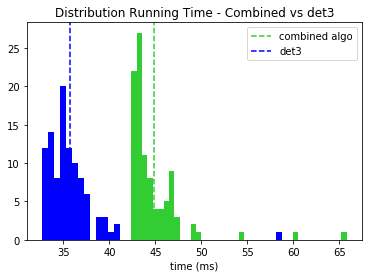

In [19]:
import matplotlib.pyplot as plt

plt.hist(time_combined, bins=int(40),color='limegreen')
plt.hist(time_MT, bins=int(40),color='blue')

plt.axvline(np.mean(time_combined), 0, max(time_combined), linestyle='dashed', color='limegreen', label="combined algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='dashed', color="blue", label="det3")

plt.legend()
plt.title('Distribution Running Time - Combined vs det3')
plt.xlabel('time (ms)')

fig.tight_layout()
plt.savefig('Combined_housesales.pdf')
plt.show()